In [2]:
import vaex
import matplotlib
from vaex.ui.colormaps import cm_plusmin
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

##routine to split csv, SLOW: Run one time and then comment the line!

#df = vaex.from_csv(r'C:\Users\carlo\Dropbox\xampp2\mysql\data\business_navigator\companies-on-linkedin.csv', header=0, sep=';', convert=True, chunk_size=1_000_000)
df = vaex.open(r'C:\Users\carlo\Dropbox\xampp2\mysql\data\business_navigator\companies-on-linkedin.csv.hdf5')

In [3]:
#Cleaning, scaling down
df["Total_employee_estimate"] = df.Total_employee_estimate.astype('int')
df["Current_employee_estimate"] = df.Total_employee_estimate.astype('int')
df["Year_founded"] = df.Year_founded.astype('int')
df['lower_range'] = df.Size_range.str.slice(start=0, stop=1).astype('int')
df['upper_range'] = df.Size_range.str.slice(start=4, stop=6).astype('int')

def city (locality):
        try:
            return str(locality.split(',')[0])
        except:
            return 'None'
def estate (locality):
    try:
        return str(locality.split(',')[1])
    except:
        return 'None'
def country (locality):
    try:
        return str(locality.split(',')[2])
    except:
        return 'None'

df['city'] = df.Locality.apply(city)
df['estate'] = df.Locality.apply(estate)
df['country'] = df.Locality.apply(country)
df.info()

column,type,unit,description,expression
Industry,str,,,
Locality,str,,,
Country,str,,,
Company_URL_domain,str,,,
Company_name,str,,,
Current_employee_estimate,int32,,,
Linkedin_URL,str,,,
Size_range,str,,,
Total_employee_estimate,int32,,,
Year_founded,int32,,,


In [4]:
#first descriptives
df = df[((df.Year_founded<=2021)) & ((df.Current_employee_estimate>=0))]
print(df.mean('Year_founded', binby=['Current_employee_estimate'], shape=4))

[-9.54049757e+08 -6.44975943e+08 -6.22082344e+08 -6.00973491e+08]


In [5]:
print("sample size:", df.count(), "mean # of employees:", df.mean(df.Total_employee_estimate))
print("\n", df.groupby(by='Industry', agg={'mean_size': vaex.agg.mean('Current_employee_estimate'), 'max_size': vaex.agg.max('Current_employee_estimate')}))
print("\n", df.groupby(by='Industry').agg({'Industry': 'count','Total_employee_estimate': ['mean', 'std']}))

sample size: 7173411 mean # of employees: 32.25442805382265

 #    Industry                        mean_size           max_size
0    null                            1.5564356230797614  468
1    security and investigations     25.369113890890038  58905
2    farming                         15.924033996319986  36162
3    packaging and containers        31.043956743002546  22514
4    computer software               26.212497647280255  276983
...  ...                             ...                 ...
144  luxury goods & jewelry          33.49920760697306   22222
145  ranching                        7.902323580034423   938
146  fishery                         12.100212314225054  5954
147  legislative office              230.956106870229    38443
148  alternative dispute resolution  9.735582581404472   2979

 #    Industry               count    Total_employee_estimate_mean    Total_employee_estimate_std
0    null                   290003   1.5564356230797614              2.1954016496945536

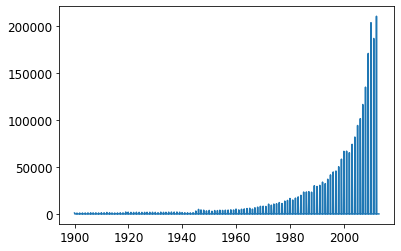

In [6]:
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

years = [1900, 2013]
bins = 1000
counts_x = df.count(binby=df.Year_founded, limits=years, shape=bins)
counts_x

plt.plot(np.linspace(years[0], years [1], bins), counts_x)
plt.show()

### https://vaex.readthedocs.io/en/latest/tutorial.html

<AxesSubplot:>

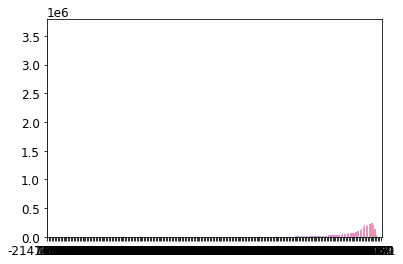

In [9]:
companies_years = df.Year_founded.value_counts()
sns.barplot(x=companies_years.index, y=companies_years.values)